In [1]:
"""Run notebook from project root"""

import os
if os.path.split(os.getcwd())[-1] == "notebooks":
    %cd ..
print(f"Running notebook from {os.getcwd()}")

/Users/kincannonwilson/Desktop/School/Projection-Correction
Running notebook from /Users/kincannonwilson/Desktop/School/Projection-Correction


In [2]:
"""imports"""

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import pyautogui
from PIL import Image
from utils.transform_recorded import contour_perspective_transform, manual_perspective_transform
from utils.read_img import pathToCV2
from helpers import show_img_in_subplots, show_single_img

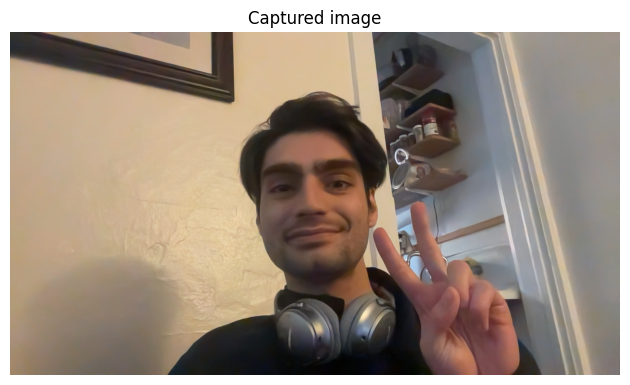

In [15]:
"""Testing video capture from webcam"""

# index 1 for front-facing laptop camera (useful when testing)
# index 0 for usb-attached webcam
cap = cv2.VideoCapture(1) 
time.sleep(0.5)

# Check if the webcam is opened successfully
if not cap.isOpened():
    raise Exception("Error: Could not open webcam")
    
# Capture one frame from feed and check if valid
ret, frame = cap.read()
if not ret:
    raise Exception("Error: Could not capture frame")

cap.release()

show_single_img(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), "Captured image")

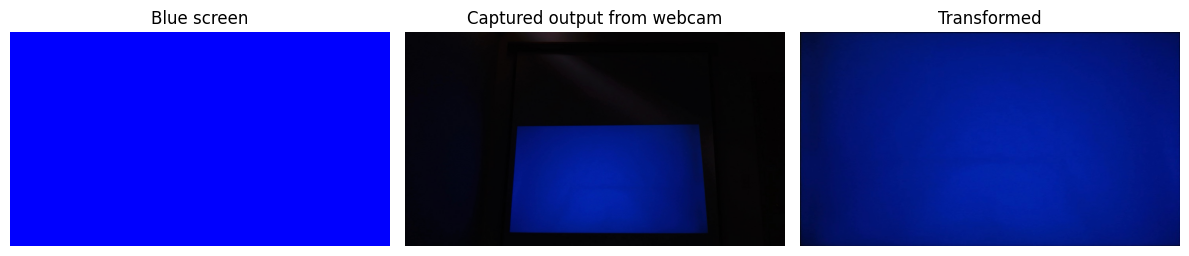

In [4]:
"""Show example capture"""

actual = pathToCV2("inputs/blue_screen.png")
recorded = pathToCV2("inputs/captured_image.jpg")
transformed = contour_perspective_transform(actual, recorded)
show_img_in_subplots([actual, recorded, transformed], ["Blue screen", "Captured output from webcam", "Transformed"], 1, 3, (12,8))

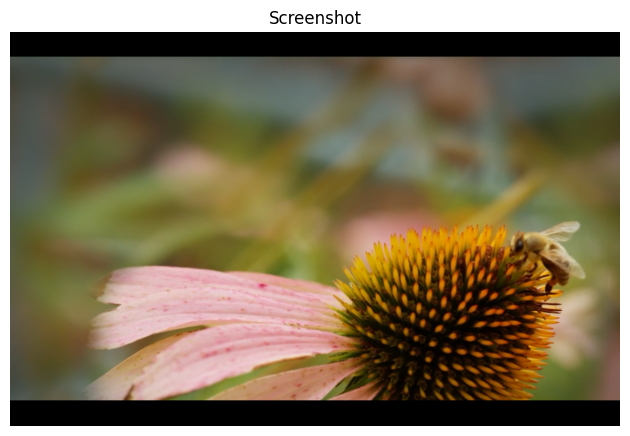

In [18]:
"""Get a screenshot (used to get the actual images)"""

time.sleep(5)
screenshot = pyautogui.screenshot()
show_single_img(screenshot, "Screenshot")

In [19]:
"""Demo system with front-facing camera"""

# Establish where to save images 
OUTPUT_DIR = "inputs/webcam_test"
if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)

# Set up video feed
cap = cv2.VideoCapture(1) 
time.sleep(5) # time to change screens to movie

# How many seconds to run experiment
RUNTIME = 5
start_time = time.time()
i = 0

while time.time() - start_time < RUNTIME:
    ret, recorded = cap.read()
    if not ret:
        print("Error: Could not capture frame")
        continue
    recorded = np.array(recorded)
    cv2.imwrite(f"{OUTPUT_DIR}/recorded_{i}.jpg", recorded)
    actual_rgba = pyautogui.screenshot()
    actual = Image.new("RGB", actual.size)
    actual.paste(actual_rgba, (0, 0), actual_rgba)
    actual.save(f"{OUTPUT_DIR}/actual_{i}.jpg")
    i += 1

cap.release()

Overall, we've got a decent system here for capturing 
both recorded (from a camera feed) and actual (from screenshots)
images for the purpose of data collection. Since the loop 
in the above cell ran for 5 and 10 recorded images were saved,
it looks like this basic setup is capable of running 
at 2 FPS.